# Color Spaces in OpenCV | Python

### Each color space has a specific purpose and the choice of color space depends on the task.

# 1. RGB (Red, Green, Blue)
### RGB color model represents colors using three primary colors: red, green and blue. Each pixel in an image is a combination of these three colors at different intensities, creating a wide range of possible colors.This is the standard color space used for displaying images on screens and working with digital images.

![Alt Text](color_spaces/RGB_paint.png)

# 2. BGR (Blue, Green, Red)
### OpenCV uses BGR instead of RGB as its default color space where the red and blue channels are swapped. While this difference may seem small, it’s important to remember when working with OpenCV to avoid color mismatches.

# 3. HSV (Hue, Saturation, Value)
### HSV is another color space used in OpenCV. It’s based on the human perception of color and it splits color information into three components:

## Hue: Represents the color itself (e.g red, blue, green).
### * Saturation: Shows the vibrancy of the color.
### * Value: Defines the brightness of the color.
### * The hue value ranges from 0 to 179, while saturation and value range from 0 to 255.

### It is useful for tasks like color segmentation and object detection. For example, it allows us to easily isolate specific colors (like red or blue) in an image.

![Alt Text](color_spaces/Hsv_paint.png)

# 4. CMYK (Cyan, Magenta, Yellow, Black)
### CMYK color model is used for color printing. It’s a subtractive color model, means colors are created by subtracting light using different combinations of cyan, magenta, yellow and black inks. In this model, colors become darker as we add more ink. It is used in print and graphic design but it's not as frequently used in OpenCV for image processing.

![Alt Text](color_spaces/cmyk_paint.png)

# 5. Grayscale
### A grayscale image contains only shades of gray, with each pixel representing a different intensity level from black to white. It is used when color information is not needed such as in edge detection or image thresholding tasks.

![Alt Text](color_spaces/grayscale.png)

# Converting Between Color Spaces in OpenCV
### OpenCV makes it easy to convert between different color spaces. This is useful when we want to perform tasks like object detection based on color or extract features using specific color information.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('color_spaces/sample_parrot-image.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# # Display each image in separate windows
# cv2.imshow('Original BGR', image)
# cv2.imshow('RGB', image_rgb)
# cv2.imshow('HSV', image_hsv)
# cv2.imshow('Grayscale', image_gray)
# cv2.imshow('LAB', image_lab)

# # Wait for key press and close all windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()

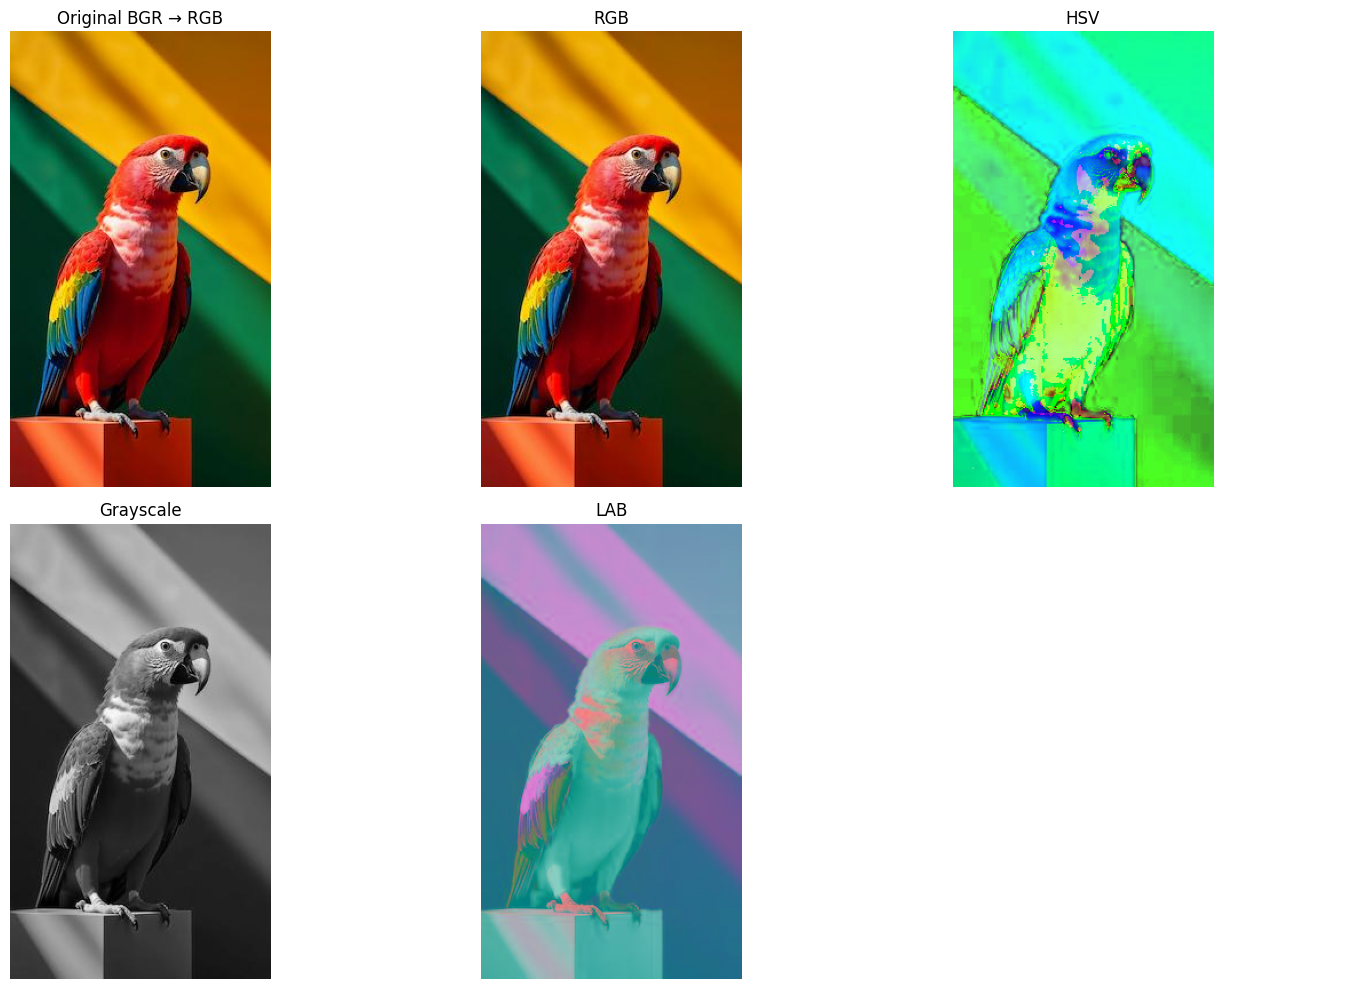

In [3]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Display images
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original BGR → RGB')
axes[0, 0].axis('off')

axes[0, 1].imshow(image_rgb)
axes[0, 1].set_title('RGB')
axes[0, 1].axis('off')

axes[0, 2].imshow(image_hsv)
axes[0, 2].set_title('HSV')
axes[0, 2].axis('off')

axes[1, 0].imshow(image_gray, cmap='gray')
axes[1, 0].set_title('Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(image_lab)
axes[1, 1].set_title('LAB')
axes[1, 1].axis('off')

# Hide empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


# Practical Example
## Lets see some common practical examples for better understanding.

# 1. Detecting Red Color in an Image Using HSV
### Here we will see how to use the HSV color space to detect and isolate a specific color, in this case, red within an image. The HSV color space is often preferred over the RGB color space for tasks like color detection because it separates color (hue) from intensity (value). This makes it easier to define specific color ranges and perform operations like color segmentation.

In [4]:
image = cv2.imread('color_spaces/sample_parrot-image.jpg')

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

mask = cv2.inRange(image_hsv, lower_red, upper_red)

result = cv2.bitwise_and(image, image, mask=mask)

cv2.imshow('image', image)
cv2.imshow('result', result)

# Wait for key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2. Visualizing the Different Color Channels of an RGB Image
### Now we will break down an RGB image into its individual color channels; Red, Green and Blue and display each channel separately. This process is important for understanding how each color component contributes to the final image. Visualizing the individual channels can be useful in image processing tasks such as color-based segmentation, image enhancement and feature extraction.

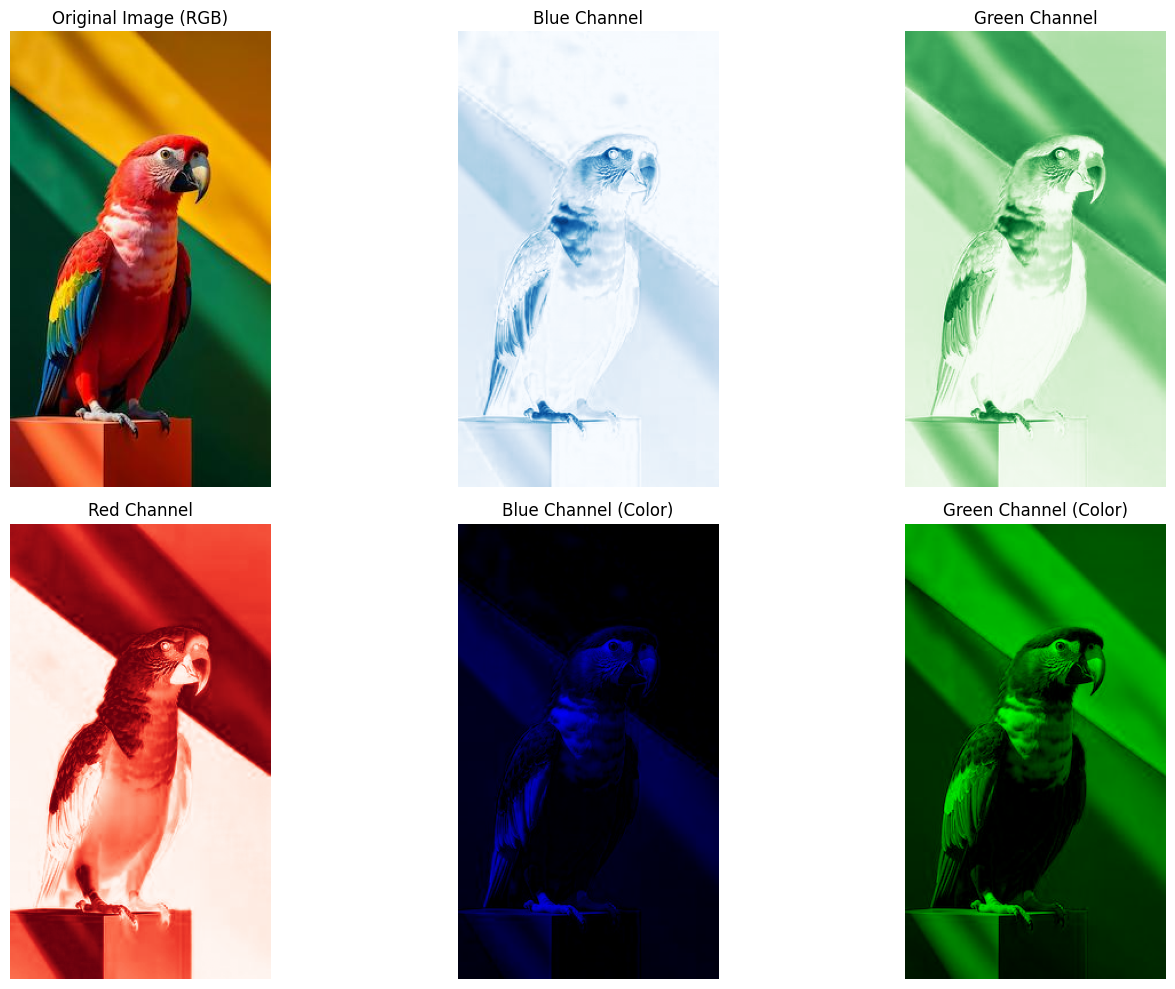

In [5]:
# image = cv2.imread('images/sample_parrot-image.jpg')

# B, G, R = cv2.split(image)

# cv2.imshow('image', image)
# cv2.waitKey(0)

# cv2.imshow('B', B)
# cv2.waitKey(0)

# cv2.imshow('G', G)
# cv2.waitKey(0)

# cv2.imshow('R', R)
# cv2.waitKey(0)

# cv2.destroyAllWindows()

# Read image and split channels
image = cv2.imread('color_spaces/sample_parrot-image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for proper display
B, G, R = cv2.split(image)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original Image (RGB)')
axes[0, 0].axis('off')

# Blue channel
axes[0, 1].imshow(B, cmap='Blues')
axes[0, 1].set_title('Blue Channel')
axes[0, 1].axis('off')

# Green channel
axes[0, 2].imshow(G, cmap='Greens')
axes[0, 2].set_title('Green Channel')
axes[0, 2].axis('off')

# Red channel
axes[1, 0].imshow(R, cmap='Reds')
axes[1, 0].set_title('Red Channel')
axes[1, 0].axis('off')

# Color image reconstruction visualization
zeros = np.zeros_like(B)
B_channel = cv2.merge([B, zeros, zeros])
G_channel = cv2.merge([zeros, G, zeros])
R_channel = cv2.merge([zeros, zeros, R])

axes[1, 1].imshow(cv2.cvtColor(B_channel, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Blue Channel (Color)')
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(G_channel, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Green Channel (Color)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()